<a href="https://colab.research.google.com/github/sharathchandran2001/ai_ml_fusion_stock_prediction/blob/main/AI_ML_fusion_Multi_output_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost scikit-learn pandas matplotlib yfinance --quiet

Fetched 1 news articles for IONQ.
Fetched {'Error Message': 'Legacy Endpoint : Due to Legacy endpoints being no longer supported - This endpoint is only available for legacy users who have valid subscriptions prior August 31, 2025. Please visit our subscription page to upgrade your plan or contact us at https://site.financialmodelingprep.com/developer/docs/pricing'} news articles.
📊 Linear Regression with Sentiment
R²: 0.8383
🚀 XGBoost with Sentiment
R²: 0.8272


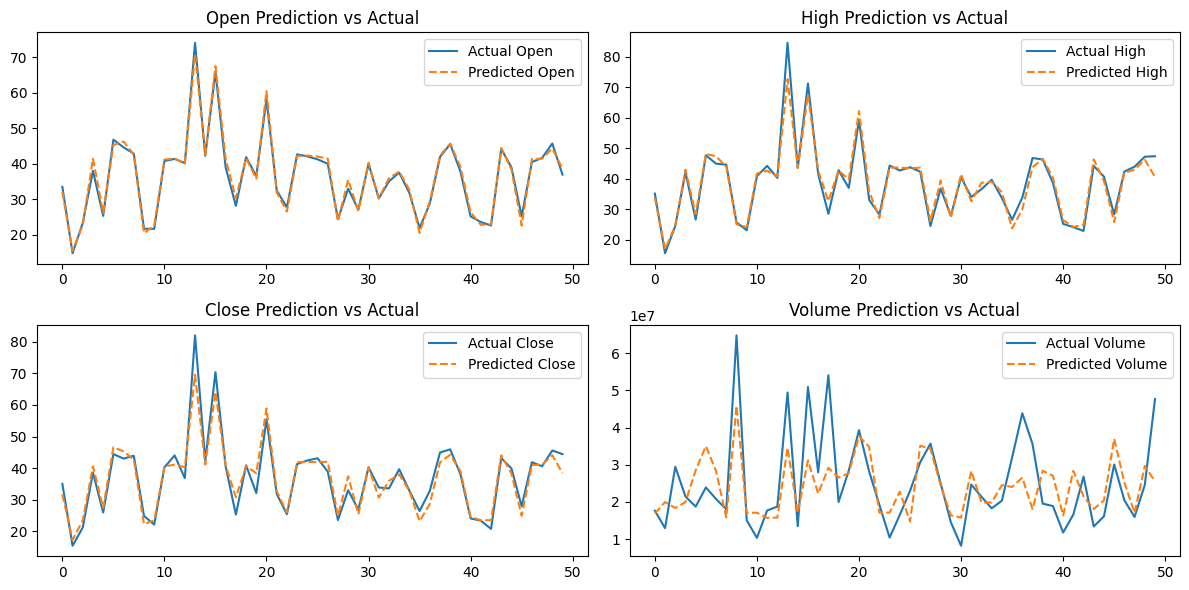

🔮 Predicted Next-Day [Open, High, Close, Volume]: [6.1592094e+01 6.2320892e+01 5.9853848e+01 3.6278252e+07]



In [ ]:
# ======================================================
# 📊 Multi-Output Stock Predictor with Sentiment Variance
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import xgboost as xgb
from textblob import TextBlob
import requests

# === Step 1: Load CSV Stock Data ===
csv_data = """Date,Open,High,Low,Close,Volume
2024-10-25,15.8,17.05,15.71,16.96,25259600
2024-10-28,17.52,18.2,16.55,17.81,31529500
2024-10-29,17.5,17.8,15.73,16.74,32312900
2024-10-30,15.76,17.55,15.76,16.87,23685200
2024-10-31,16.71,16.98,14.76,15.03,22506900
2024-11-01,15.27,15.51,14.53,14.85,15847000
2024-11-04,14.9,15.11,14.15,14.37,12424200
2024-11-05,14.79,15.55,14.63,15.35,12942800
2024-11-06,16.73,16.83,15.85,16.45,20834500
2024-11-07,16.43,22.62,16.29,22.11,70733400
2024-11-08,21.69,25.68,21.31,24.79,64845200
2024-11-11,24.39,24.49,21.3,23.52,35693700
2024-11-12,22,25.44,22,23.01,28019200
2024-11-13,23.88,27.65,23.67,26.76,41306100
2024-11-14,27.9,28.05,24.87,26.16,35122500
2024-11-15,26.29,29.48,25.03,29.14,37576000
2024-11-18,28.15,28.47,22.27,25.23,54116400
2024-11-19,25.2,28.3,24.87,27.89,30086600
2024-11-20,27.91,30.5,27.43,28.86,28874800
2024-11-21,28.8,33.8,28.48,32.78,43881800
2024-11-22,32.49,33.07,30.3,31.8,28146300
2024-11-25,33.93,35.24,30.46,30.88,31379300
2024-11-26,30.5,32.86,29.7,30.65,22521800
2024-11-27,31.1,32.37,28.32,32.21,24277900
2024-11-29,32.21,37.28,31.96,36.5,23227400
2024-12-02,36.54,37,31.77,32.06,28440400
2024-12-03,31.8,33.68,30.82,32.79,20329100
2024-12-04,32.68,34.95,31.17,33.42,17219600
2024-12-05,33.95,37.64,32.65,35.95,28954000
2024-12-06,36.31,38.45,34.9,37.97,19783600
2024-12-09,38,38.25,34.16,34.24,22414900
2024-12-10,33,36.75,32.63,32.97,25017800
2024-12-11,32.99,32.99,28.04,29.83,36443900
2024-12-12,29.36,32.78,28.94,29.99,21879500
2024-12-13,30.23,34.03,29.52,33.83,24677300
2024-12-16,32.47,42.81,32.39,41.81,42539400
2024-12-17,41.64,43.94,39.25,43.84,31560500
2024-12-18,41.65,44.99,37,37.5,37488600
2024-12-19,40.71,42.4,36.54,37.76,27705800
2024-12-20,36.96,47.41,36.7,44.42,47711400
2024-12-23,45.33,45.5,41.3,41.32,27057200
2024-12-24,41.99,45.4,39.84,44.58,18418400
2024-12-26,44.5,48.56,42.56,48.24,24726600
2024-12-27,46.87,48.25,44.5,45.48,22491400
2024-12-30,44.6,45.79,41.51,44.29,17610900
2024-12-31,44.52,45.14,40.9,41.77,15311400
2025-01-02,41.28,43.79,38.46,43.1,22986200
2025-01-03,43.1,47.91,43,47.77,28235500
2025-01-06,48.3,51.66,47.13,51.07,23299900
2025-01-07,51.28,54.74,48.73,49.59,27090300
2025-01-08,38.75,39,25.92,30.25,128343800
2025-01-10,31.99,33.98,28.51,32.33,69769800
2025-01-13,29.55,32.83,27.16,27.86,52751700
2025-01-14,28.2,30.2,26.63,29.51,43673200
2025-01-15,32.78,40.5,32.41,39.39,74872100
2025-01-16,36.86,42,36.13,41.55,46324600
2025-01-17,40.03,42.35,38.77,38.89,30697700
2025-01-21,39.19,45.56,38.8,45.31,35231900
2025-01-22,45.24,45.35,40.94,42.04,26440200
2025-01-23,41.44,43.94,40.33,41.35,17140800
2025-01-24,41.69,44.23,40.51,40.76,19665900
2025-01-27,38.02,42.12,37,38.54,21461100
2025-01-28,40.01,40.36,35.75,38.86,15725200
2025-01-29,39.26,40.6,38.39,39.54,13098600
2025-01-30,40.45,41.68,38.23,38.81,12505500
2025-01-31,38.96,42.98,38.8,39.49,20046600
2025-02-03,37.4,42.38,37.21,41.47,16578800
2025-02-04,41.89,44.59,41.43,41.86,16434500
2025-02-05,42.27,43.59,39.65,42.32,13473000
2025-02-06,42.67,44.34,40.65,41.27,10405900
2025-02-07,41.66,43.97,40.05,40.57,15951700
2025-02-10,39.49,42.85,39.18,41.07,13666900
2025-02-11,41.8,42.49,37.55,37.7,15568800
2025-02-12,38,39.33,37.51,38,11894500
2025-02-13,38.58,38.85,36.52,38.65,14220200
2025-02-14,38.4,38.58,37.04,37.46,8178200
2025-02-18,36,36.32,32.82,33.94,20116100
2025-02-19,33.33,35.93,32.34,34.14,20531200
2025-02-20,35.64,35.71,32.84,33.75,13058700
2025-02-21,34.81,35.5,31.36,31.74,15788800
2025-02-24,31.16,32.54,30.01,31.24,12451800
2025-02-25,30.88,31.11,28.12,29.73,13278400
2025-02-26,30.78,31.07,29.55,29.93,13883600
2025-02-27,28.04,28.99,24.33,24.91,34732800
2025-02-28,24.04,25.62,23.01,24.57,21996100
2025-03-03,25.32,25.58,22.65,23.11,18253700
2025-03-04,21.45,23.2,20.84,22.35,21074800
2025-03-05,22.91,23.2,21.66,22.63,16067800
2025-03-06,21.99,22.06,20.32,20.48,16639300
2025-03-07,20.51,21.29,19.92,20.55,16189200
2025-03-10,20,20.11,17.93,18.27,15686800
2025-03-11,18.38,19.18,17.88,18.7,17836200
2025-03-12,20.27,22.19,19.59,21.82,27255100
2025-03-13,21.7,22.57,20.57,21.37,32423200
2025-03-14,22.13,25.24,22.06,25,37795900
2025-03-17,24.98,25.5,24.03,24.93,30552900
2025-03-18,23.65,24.46,22.64,22.68,20876300
2025-03-19,23.59,24.12,22.18,23.3,16600500
2025-03-20,23.33,24.5,20.61,21.14,29478500
2025-03-21,20.96,22.72,20.86,22.26,21965900
2025-03-24,23.23,26.32,23.08,26.12,34724200
2025-03-25,25.77,26.19,25.04,25.55,17186900
2025-03-26,26.73,27.83,24.66,24.8,29897400
2025-03-27,24.09,25.2,23.44,23.65,14119000
2025-03-28,23.66,23.66,21.92,22.85,15453500
2025-03-31,21.67,23.1,21.5,22.07,15046800
2025-04-01,24.31,24.62,22.22,23.19,22958100
2025-04-02,23.08,25.83,22.69,25.05,25696300
2025-04-03,23.13,23.78,22.53,23.25,19912800
2025-04-04,22.6,22.87,19.37,20.68,26829500
2025-04-07,19.61,24,18.81,22.75,29250700
2025-04-08,24.05,24.6,20.65,21.28,26233100
2025-04-09,21.88,26.56,21.36,26.37,31936100
2025-04-10,25.33,26.61,24.45,25.89,18742100
2025-04-11,26.24,27.25,25.37,26.09,15810600
2025-04-14,27.7,28.25,24.75,25.35,19201300
2025-04-15,25.59,26.08,24.67,25.4,9735200
2025-04-16,24.45,25.36,23.8,24.57,9711300
2025-04-17,24.93,25.87,24.48,25.74,10178700
2025-04-21,25.16,25.2,23.49,24.03,11771300
2025-04-22,24.49,25.93,23.93,25.56,12158500
2025-04-23,27.09,27.84,26.27,26.8,14517900
2025-04-24,27,29.58,26.96,28.39,17959300
2025-04-25,28.42,31.85,27.71,28.9,27672300
2025-04-28,29.29,29.96,27.27,28.7,13570800
2025-04-29,28.9,29.14,27.69,28.09,8214700
2025-04-30,26.72,27.5,26.33,27.46,9548200
2025-05-01,28.33,28.46,27.16,27.38,9987400
2025-05-02,27.8,31.33,27.65,30.92,24011700
2025-05-05,30.13,30.83,29.61,29.82,9584900
2025-05-06,28.55,29.5,27.97,29.42,10913300
2025-05-07,29.02,29.35,28.5,29.14,8906100
2025-05-08,31.74,33.5,28.11,31.84,39187700
2025-05-09,31.43,32.64,29.93,31.27,19086400
2025-05-12,33.12,33.93,31.93,32.89,16465600
2025-05-13,32.61,34.1,32.33,33.22,13943100
2025-05-14,33.7,35.29,32.75,33.41,18701800
2025-05-15,32.93,34.4,32.23,32.54,11151400
2025-05-16,33.52,35.15,32.97,34.99,17643800
2025-05-19,33.6,35.13,32.83,35.09,13255300
2025-05-20,35.89,35.99,34.19,35.31,17686200
2025-05-21,35.08,36.61,33.33,33.54,21395200
2025-05-22,33.82,48.92,33.73,45.79,105188100
2025-05-23,41.96,47.87,41.21,45.69,53827300
2025-05-27,46.55,48.08,43.6,48.04,30147600
2025-05-28,46,48.94,44.65,47.56,28831300
2025-05-29,48,48.82,42.94,43.2,25706100
2025-05-30,40.46,41.61,39.3,40.34,27156200
2025-06-02,40.01,41.07,38.35,40.57,15261800
2025-06-03,41.74,42.39,39.52,39.81,12476200
2025-06-04,40.04,40.15,37.93,39.64,12079000
2025-06-05,39.1,39.25,35.93,36.66,17201700
2025-06-06,37.67,39.95,36.8,39.02,16146100
2025-06-09,42.53,42.55,38.85,40.06,36305100
2025-06-10,40.64,44.05,39.46,39.74,31977900
2025-06-11,41.59,43.96,38.94,39.7,53397300
2025-06-12,39.49,40.86,38.62,38.71,20079600
2025-06-13,37.59,39.83,37.44,37.84,19404600
2025-06-16,37.24,39.26,36.03,38.43,29311100
2025-06-17,37.86,38.66,36.86,38.04,18889300
2025-06-18,37.52,39.67,37.31,39.63,18288700
2025-06-20,39.61,41.44,38.92,40.36,33099000
2025-06-23,38.87,41.21,37.38,41.14,24966100
2025-06-24,41.9,42.81,40.53,40.86,19999100
2025-06-25,41.72,42.13,38.06,38.11,16075700
2025-06-26,39.57,41.7,39.01,41.12,21786400
2025-06-27,41.3,41.87,38.97,40.25,21643300
2025-06-30,41.21,44.1,41.08,42.97,29526400
2025-07-01,42.37,42.67,39.72,40.1,21237900
2025-07-02,41.19,44.92,40.47,44.75,24757100
2025-07-03,44.22,45.58,43.22,44.39,13345300
2025-07-07,46.38,47.21,42.85,45.2,33850900
2025-07-08,46.65,47.88,44.68,44.97,25675900
2025-07-09,45.73,47.25,44.48,45.56,24574200
2025-07-10,45.56,46.35,44.53,45.93,19544600
2025-07-11,45,45.57,41.77,41.81,23363600
2025-07-14,42.09,42.72,41.38,42.41,16527600
2025-07-15,42.55,43.14,41.08,41.47,15889200
2025-07-16,42.25,43.67,40.84,43.54,24133200
2025-07-17,43.44,44.86,43.12,44.84,20228800
2025-07-18,44.87,47.64,44.02,46.51,25760400
2025-07-21,46.81,47.72,44.42,44.43,23907000
2025-07-22,44.52,44.54,41.29,41.94,18995700
2025-07-23,42.74,43.54,41.78,43.28,14455100
2025-07-24,42.89,44.64,42.25,43.9,18006300
2025-07-25,44.24,44.25,42.94,43.17,13392000
2025-07-28,43.92,44.53,41.44,42.34,16976700
2025-07-29,43.01,44.21,40.35,40.53,21070300
2025-07-30,40.97,41.86,39.23,39.88,17861400
2025-07-31,41.12,42.28,39.62,39.87,21572700
2025-08-01,38.94,39.19,37.25,38.12,20028200
2025-08-04,38.99,40.7,38.42,39.86,16131400
2025-08-05,40.64,42.44,40.13,42.02,22060500
2025-08-06,43.6,43.6,40.78,41.23,23969600
2025-08-07,38.98,41.58,38.61,40.49,27970400
2025-08-08,40.51,42.37,40.41,41.85,20441500
2025-08-11,41.95,46.82,41.41,44.94,35598800
2025-08-12,44.65,44.97,42.63,43,20775300
2025-08-13,43.23,43.5,40.75,41.21,20702300
2025-08-14,40.51,41.12,39.28,41.03,16638200
2025-08-15,40.78,40.83,39.42,40.23,10334800
2025-08-18,40,40.5,39.01,40.23,8204300
2025-08-19,40.22,40.29,36.58,36.8,18738400
2025-08-20,37.38,37.41,34.77,36.79,16401300
2025-08-21,37.25,37.38,36.45,37.17,10121000
2025-08-22,37.1,39.92,36.65,39.78,15199400
2025-08-25,39.7,39.82,38.53,38.68,12158700
2025-08-26,38.85,40.92,38.71,40.75,13548900
2025-08-27,41.02,42.67,40.77,41.42,17335700
2025-08-28,41.55,43.73,41.45,43.3,16109100
2025-08-29,42.55,43.27,41.81,42.74,11540600
2025-09-02,41.03,43.05,40.22,42.99,13787100
2025-09-03,42.65,43.21,40.58,40.97,10369800
2025-09-04,41.23,43.03,40.79,42.11,13213900
2025-09-05,42.46,42.73,40.51,41.8,11508900
2025-09-08,42.09,42.59,40.38,41.01,10501700
2025-09-09,41.39,44.26,41.04,44,17694900
2025-09-10,44.31,45.18,43.56,43.86,14430000
2025-09-11,44.2,47.23,43.38,47.05,21599100
2025-09-12,47.3,56.07,47.15,55.61,68818800
2025-09-15,56.88,59.89,55.95,59.11,34677000
2025-09-16,58.98,62.85,57.13,62.26,30636600
2025-09-17,63.31,66.39,61.08,65.44,49629900
2025-09-18,68.57,70.43,65.42,66.81,45892900
2025-09-19,65.98,71.3,65.64,70.41,50959400
2025-09-22,68.11,73.17,66.15,71.94,35675500
2025-09-23,74.08,76.13,71.45,75.14,40011900
2025-09-24,75.25,75.95,71.01,73.86,33075600
2025-09-25,71.16,72.29,66.91,69.43,44799700
2025-09-26,68.41,70.42,65.33,67.28,32156900
2025-09-29,68.38,68.88,63.22,64.26,27595300
2025-09-30,63.59,65,60.59,61.5,22600600
2025-10-01,61.38,64.85,60.14,63.09,33912400
2025-10-02,64.81,69.6,64.41,69.6,37383600
2025-10-03,70.59,73.76,68.35,73.28,37681800
2025-10-06,72,79.23,71.88,78.99,36301000
2025-10-07,80.96,82.97,75.48,79.23,47589100
2025-10-08,78.95,82.41,72.6,74.3,40788200
2025-10-09,74.87,78,73.65,77.5,25016200
2025-10-10,77,77.38,70.64,70.65,41146800
2025-10-13,74.11,84.64,72.8,82.09,49458800
2025-10-14,79.85,81.08,75.92,77.55,34459600
2025-10-15,79.94,80.23,70.8,72.41,31348000
2025-10-16,73.87,73.87,65.5,65.59,35988400
2025-10-17,65.4,65.72,61.21,62.94,33423300
2025-10-20,65.31,65.5,58.69,59.94,28516100
2025-10-21,60.44,60.9,57.21,59.5,26167000
2025-10-22,58.2,59.35,52.27,55.45,39326800
2025-10-23,61.1,62.93,57,59.37,65822800
2025-10-24,62.01,64.11,59.92,60.3,27401100
"""
df = pd.read_csv(StringIO(csv_data))

# === Step 2: Fetch Latest News via FinancialModelingPrep API ===
api_key = "pW39pC0M76QaLc1q9BAy38VkUNwLpa6t"  # Replace with your FMP API key
symbol = "IONQ"

url = f"https://financialmodelingprep.com/api/v3/stock_news?tickers={symbol}&limit=50&apikey={api_key}"
resp = requests.get(url)
news_json = resp.json()
print(f"Fetched {len(news_json)} news articles for {symbol}.")
print("============================================================")
print(f"Fetched {news_json} news articles.")
print("============================================================")

# Extract headline list safely
news_items = news_json if isinstance(news_json, list) else news_json.get('stockNews', [])
headlines = [item['title'] for item in news_items if 'title' in item]

# Fallback: if no headlines returned, use dummy headlines
if not headlines:
    headlines = ["No news available"] * len(df)

# If df has more rows than headlines, repeat headlines cyclically
if len(headlines) < len(df):
    repeats = (len(df) // len(headlines)) + 1
    headlines = (headlines * repeats)[:len(df)]

df["Headline"] = headlines

# === Step 3: Sentiment Score ===
df["Sentiment_Score"] = df["Headline"].apply(lambda x: TextBlob(x).sentiment.polarity)

# === Step 4: Create Targets & Features ===
for col in ['Open','High','Close','Volume']:
    df[f"{col}_next"] = df[col].shift(-1)
df.dropna(inplace=True)

df["Price_Change"] = df["Close"] - df["Open"]
df["Volatility"] = df["High"] - df["Low"]
df["Rolling_Avg_Close"] = df["Close"].rolling(3).mean().fillna(df["Close"].mean())

features = ["Open","High","Low","Close","Volume",
            "Price_Change","Volatility","Rolling_Avg_Close","Sentiment_Score"]
targets = ["Open_next","High_next","Close_next","Volume_next"]

X = df[features]
y = df[targets]

# === Step 5: Train/Test Split ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# === Step 6: Baseline Linear Regression ===
lr_multi = MultiOutputRegressor(LinearRegression())
lr_multi.fit(X_train_scaled, y_train)
y_pred_lr = lr_multi.predict(X_test_scaled)

print("📊 Linear Regression with Sentiment")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

# === Step 7: XGBoost with Hyperparameter Tuning ===
param_grid = {"n_estimators":[50,100], "max_depth":[2,3], "learning_rate":[0.05,0.1]}
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_multi = MultiOutputRegressor(GridSearchCV(xgb_model, param_grid, cv=3, scoring="r2"))
xgb_multi.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_multi.predict(X_test_scaled)

print("🚀 XGBoost with Sentiment")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")

# === Step 8: Visualization ===
plt.figure(figsize=(12,6))
labels = ["Open","High","Close","Volume"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(y_test[targets[i]].values, label=f"Actual {labels[i]}")
    plt.plot(y_pred_xgb[:,i], label=f"Predicted {labels[i]}", linestyle="--")
    plt.title(f"{labels[i]} Prediction vs Actual")
    plt.legend()
plt.tight_layout()
plt.show()

# === Step 9: Predict for Last Row ===
last_row_scaled = scaler.transform(X.iloc[[-1]])
predicted_next = xgb_multi.predict(last_row_scaled)[0]
print(f"🔮 Predicted Next-Day [Open, High, Close, Volume]: {predicted_next}\n")


### **With** out APIs   ============================================================================

Sentiment Scores:
0      0.433333
1      0.227273
2      0.000000
3      0.100000
4      0.136364
         ...   
245    0.433333
246    0.227273
247    0.000000
248    0.100000
249    0.136364
Name: Sentiment_Score, Length: 250, dtype: float64
📊 Linear Regression with Sentiment
R²: 0.8381
🚀 XGBoost with Sentiment
R²: 0.8280


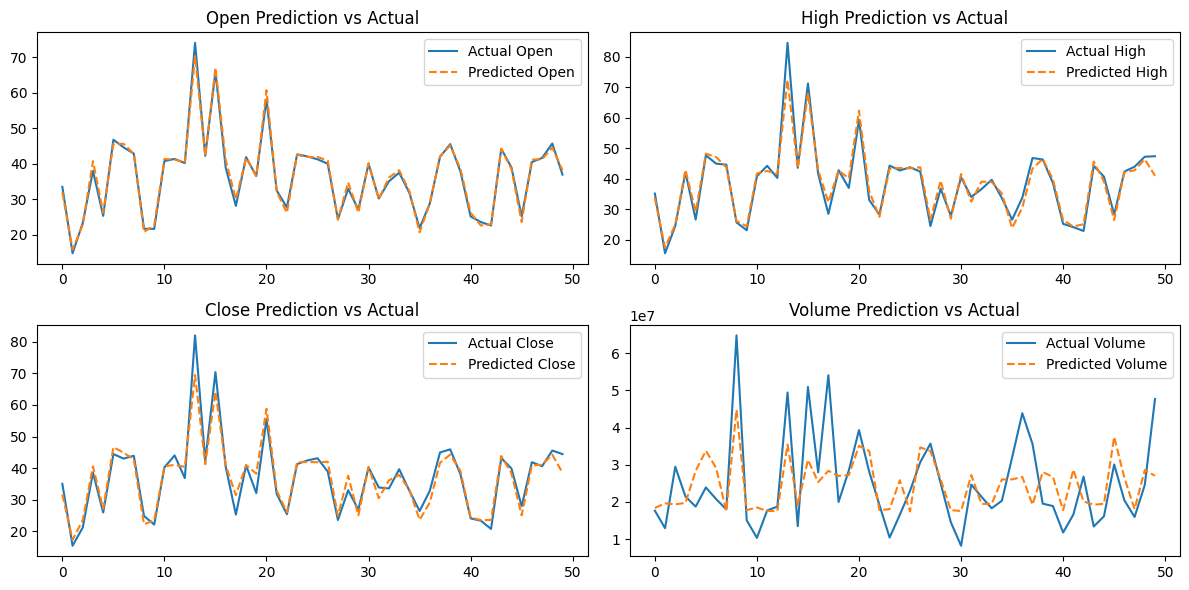

🔮 Predicted Next-Day [Open, High, Close, Volume]: [6.1080132e+01 6.3389400e+01 5.9626278e+01 3.4017864e+07]


In [ ]:
# ======================================================
# 📊 Multi-Output Stock Predictor with Sentiment (Manual Headlines)
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from textblob import TextBlob
import io

# ==========================
# Step 1: Historical Data
# ==========================
# Manually paste or load CSV data
csv_data = """Date,Open,High,Low,Close,Volume
2024-10-25,15.8,17.05,15.71,16.96,25259600
2024-10-28,17.52,18.2,16.55,17.81,31529500
2024-10-29,17.5,17.8,15.73,16.74,32312900
2024-10-30,15.76,17.55,15.76,16.87,23685200
2024-10-31,16.71,16.98,14.76,15.03,22506900
2024-11-01,15.27,15.51,14.53,14.85,15847000
2024-11-04,14.9,15.11,14.15,14.37,12424200
2024-11-05,14.79,15.55,14.63,15.35,12942800
2024-11-06,16.73,16.83,15.85,16.45,20834500
2024-11-07,16.43,22.62,16.29,22.11,70733400
2024-11-08,21.69,25.68,21.31,24.79,64845200
2024-11-11,24.39,24.49,21.3,23.52,35693700
2024-11-12,22,25.44,22,23.01,28019200
2024-11-13,23.88,27.65,23.67,26.76,41306100
2024-11-14,27.9,28.05,24.87,26.16,35122500
2024-11-15,26.29,29.48,25.03,29.14,37576000
2024-11-18,28.15,28.47,22.27,25.23,54116400
2024-11-19,25.2,28.3,24.87,27.89,30086600
2024-11-20,27.91,30.5,27.43,28.86,28874800
2024-11-21,28.8,33.8,28.48,32.78,43881800
2024-11-22,32.49,33.07,30.3,31.8,28146300
2024-11-25,33.93,35.24,30.46,30.88,31379300
2024-11-26,30.5,32.86,29.7,30.65,22521800
2024-11-27,31.1,32.37,28.32,32.21,24277900
2024-11-29,32.21,37.28,31.96,36.5,23227400
2024-12-02,36.54,37,31.77,32.06,28440400
2024-12-03,31.8,33.68,30.82,32.79,20329100
2024-12-04,32.68,34.95,31.17,33.42,17219600
2024-12-05,33.95,37.64,32.65,35.95,28954000
2024-12-06,36.31,38.45,34.9,37.97,19783600
2024-12-09,38,38.25,34.16,34.24,22414900
2024-12-10,33,36.75,32.63,32.97,25017800
2024-12-11,32.99,32.99,28.04,29.83,36443900
2024-12-12,29.36,32.78,28.94,29.99,21879500
2024-12-13,30.23,34.03,29.52,33.83,24677300
2024-12-16,32.47,42.81,32.39,41.81,42539400
2024-12-17,41.64,43.94,39.25,43.84,31560500
2024-12-18,41.65,44.99,37,37.5,37488600
2024-12-19,40.71,42.4,36.54,37.76,27705800
2024-12-20,36.96,47.41,36.7,44.42,47711400
2024-12-23,45.33,45.5,41.3,41.32,27057200
2024-12-24,41.99,45.4,39.84,44.58,18418400
2024-12-26,44.5,48.56,42.56,48.24,24726600
2024-12-27,46.87,48.25,44.5,45.48,22491400
2024-12-30,44.6,45.79,41.51,44.29,17610900
2024-12-31,44.52,45.14,40.9,41.77,15311400
2025-01-02,41.28,43.79,38.46,43.1,22986200
2025-01-03,43.1,47.91,43,47.77,28235500
2025-01-06,48.3,51.66,47.13,51.07,23299900
2025-01-07,51.28,54.74,48.73,49.59,27090300
2025-01-08,38.75,39,25.92,30.25,128343800
2025-01-10,31.99,33.98,28.51,32.33,69769800
2025-01-13,29.55,32.83,27.16,27.86,52751700
2025-01-14,28.2,30.2,26.63,29.51,43673200
2025-01-15,32.78,40.5,32.41,39.39,74872100
2025-01-16,36.86,42,36.13,41.55,46324600
2025-01-17,40.03,42.35,38.77,38.89,30697700
2025-01-21,39.19,45.56,38.8,45.31,35231900
2025-01-22,45.24,45.35,40.94,42.04,26440200
2025-01-23,41.44,43.94,40.33,41.35,17140800
2025-01-24,41.69,44.23,40.51,40.76,19665900
2025-01-27,38.02,42.12,37,38.54,21461100
2025-01-28,40.01,40.36,35.75,38.86,15725200
2025-01-29,39.26,40.6,38.39,39.54,13098600
2025-01-30,40.45,41.68,38.23,38.81,12505500
2025-01-31,38.96,42.98,38.8,39.49,20046600
2025-02-03,37.4,42.38,37.21,41.47,16578800
2025-02-04,41.89,44.59,41.43,41.86,16434500
2025-02-05,42.27,43.59,39.65,42.32,13473000
2025-02-06,42.67,44.34,40.65,41.27,10405900
2025-02-07,41.66,43.97,40.05,40.57,15951700
2025-02-10,39.49,42.85,39.18,41.07,13666900
2025-02-11,41.8,42.49,37.55,37.7,15568800
2025-02-12,38,39.33,37.51,38,11894500
2025-02-13,38.58,38.85,36.52,38.65,14220200
2025-02-14,38.4,38.58,37.04,37.46,8178200
2025-02-18,36,36.32,32.82,33.94,20116100
2025-02-19,33.33,35.93,32.34,34.14,20531200
2025-02-20,35.64,35.71,32.84,33.75,13058700
2025-02-21,34.81,35.5,31.36,31.74,15788800
2025-02-24,31.16,32.54,30.01,31.24,12451800
2025-02-25,30.88,31.11,28.12,29.73,13278400
2025-02-26,30.78,31.07,29.55,29.93,13883600
2025-02-27,28.04,28.99,24.33,24.91,34732800
2025-02-28,24.04,25.62,23.01,24.57,21996100
2025-03-03,25.32,25.58,22.65,23.11,18253700
2025-03-04,21.45,23.2,20.84,22.35,21074800
2025-03-05,22.91,23.2,21.66,22.63,16067800
2025-03-06,21.99,22.06,20.32,20.48,16639300
2025-03-07,20.51,21.29,19.92,20.55,16189200
2025-03-10,20,20.11,17.93,18.27,15686800
2025-03-11,18.38,19.18,17.88,18.7,17836200
2025-03-12,20.27,22.19,19.59,21.82,27255100
2025-03-13,21.7,22.57,20.57,21.37,32423200
2025-03-14,22.13,25.24,22.06,25,37795900
2025-03-17,24.98,25.5,24.03,24.93,30552900
2025-03-18,23.65,24.46,22.64,22.68,20876300
2025-03-19,23.59,24.12,22.18,23.3,16600500
2025-03-20,23.33,24.5,20.61,21.14,29478500
2025-03-21,20.96,22.72,20.86,22.26,21965900
2025-03-24,23.23,26.32,23.08,26.12,34724200
2025-03-25,25.77,26.19,25.04,25.55,17186900
2025-03-26,26.73,27.83,24.66,24.8,29897400
2025-03-27,24.09,25.2,23.44,23.65,14119000
2025-03-28,23.66,23.66,21.92,22.85,15453500
2025-03-31,21.67,23.1,21.5,22.07,15046800
2025-04-01,24.31,24.62,22.22,23.19,22958100
2025-04-02,23.08,25.83,22.69,25.05,25696300
2025-04-03,23.13,23.78,22.53,23.25,19912800
2025-04-04,22.6,22.87,19.37,20.68,26829500
2025-04-07,19.61,24,18.81,22.75,29250700
2025-04-08,24.05,24.6,20.65,21.28,26233100
2025-04-09,21.88,26.56,21.36,26.37,31936100
2025-04-10,25.33,26.61,24.45,25.89,18742100
2025-04-11,26.24,27.25,25.37,26.09,15810600
2025-04-14,27.7,28.25,24.75,25.35,19201300
2025-04-15,25.59,26.08,24.67,25.4,9735200
2025-04-16,24.45,25.36,23.8,24.57,9711300
2025-04-17,24.93,25.87,24.48,25.74,10178700
2025-04-21,25.16,25.2,23.49,24.03,11771300
2025-04-22,24.49,25.93,23.93,25.56,12158500
2025-04-23,27.09,27.84,26.27,26.8,14517900
2025-04-24,27,29.58,26.96,28.39,17959300
2025-04-25,28.42,31.85,27.71,28.9,27672300
2025-04-28,29.29,29.96,27.27,28.7,13570800
2025-04-29,28.9,29.14,27.69,28.09,8214700
2025-04-30,26.72,27.5,26.33,27.46,9548200
2025-05-01,28.33,28.46,27.16,27.38,9987400
2025-05-02,27.8,31.33,27.65,30.92,24011700
2025-05-05,30.13,30.83,29.61,29.82,9584900
2025-05-06,28.55,29.5,27.97,29.42,10913300
2025-05-07,29.02,29.35,28.5,29.14,8906100
2025-05-08,31.74,33.5,28.11,31.84,39187700
2025-05-09,31.43,32.64,29.93,31.27,19086400
2025-05-12,33.12,33.93,31.93,32.89,16465600
2025-05-13,32.61,34.1,32.33,33.22,13943100
2025-05-14,33.7,35.29,32.75,33.41,18701800
2025-05-15,32.93,34.4,32.23,32.54,11151400
2025-05-16,33.52,35.15,32.97,34.99,17643800
2025-05-19,33.6,35.13,32.83,35.09,13255300
2025-05-20,35.89,35.99,34.19,35.31,17686200
2025-05-21,35.08,36.61,33.33,33.54,21395200
2025-05-22,33.82,48.92,33.73,45.79,105188100
2025-05-23,41.96,47.87,41.21,45.69,53827300
2025-05-27,46.55,48.08,43.6,48.04,30147600
2025-05-28,46,48.94,44.65,47.56,28831300
2025-05-29,48,48.82,42.94,43.2,25706100
2025-05-30,40.46,41.61,39.3,40.34,27156200
2025-06-02,40.01,41.07,38.35,40.57,15261800
2025-06-03,41.74,42.39,39.52,39.81,12476200
2025-06-04,40.04,40.15,37.93,39.64,12079000
2025-06-05,39.1,39.25,35.93,36.66,17201700
2025-06-06,37.67,39.95,36.8,39.02,16146100
2025-06-09,42.53,42.55,38.85,40.06,36305100
2025-06-10,40.64,44.05,39.46,39.74,31977900
2025-06-11,41.59,43.96,38.94,39.7,53397300
2025-06-12,39.49,40.86,38.62,38.71,20079600
2025-06-13,37.59,39.83,37.44,37.84,19404600
2025-06-16,37.24,39.26,36.03,38.43,29311100
2025-06-17,37.86,38.66,36.86,38.04,18889300
2025-06-18,37.52,39.67,37.31,39.63,18288700
2025-06-20,39.61,41.44,38.92,40.36,33099000
2025-06-23,38.87,41.21,37.38,41.14,24966100
2025-06-24,41.9,42.81,40.53,40.86,19999100
2025-06-25,41.72,42.13,38.06,38.11,16075700
2025-06-26,39.57,41.7,39.01,41.12,21786400
2025-06-27,41.3,41.87,38.97,40.25,21643300
2025-06-30,41.21,44.1,41.08,42.97,29526400
2025-07-01,42.37,42.67,39.72,40.1,21237900
2025-07-02,41.19,44.92,40.47,44.75,24757100
2025-07-03,44.22,45.58,43.22,44.39,13345300
2025-07-07,46.38,47.21,42.85,45.2,33850900
2025-07-08,46.65,47.88,44.68,44.97,25675900
2025-07-09,45.73,47.25,44.48,45.56,24574200
2025-07-10,45.56,46.35,44.53,45.93,19544600
2025-07-11,45,45.57,41.77,41.81,23363600
2025-07-14,42.09,42.72,41.38,42.41,16527600
2025-07-15,42.55,43.14,41.08,41.47,15889200
2025-07-16,42.25,43.67,40.84,43.54,24133200
2025-07-17,43.44,44.86,43.12,44.84,20228800
2025-07-18,44.87,47.64,44.02,46.51,25760400
2025-07-21,46.81,47.72,44.42,44.43,23907000
2025-07-22,44.52,44.54,41.29,41.94,18995700
2025-07-23,42.74,43.54,41.78,43.28,14455100
2025-07-24,42.89,44.64,42.25,43.9,18006300
2025-07-25,44.24,44.25,42.94,43.17,13392000
2025-07-28,43.92,44.53,41.44,42.34,16976700
2025-07-29,43.01,44.21,40.35,40.53,21070300
2025-07-30,40.97,41.86,39.23,39.88,17861400
2025-07-31,41.12,42.28,39.62,39.87,21572700
2025-08-01,38.94,39.19,37.25,38.12,20028200
2025-08-04,38.99,40.7,38.42,39.86,16131400
2025-08-05,40.64,42.44,40.13,42.02,22060500
2025-08-06,43.6,43.6,40.78,41.23,23969600
2025-08-07,38.98,41.58,38.61,40.49,27970400
2025-08-08,40.51,42.37,40.41,41.85,20441500
2025-08-11,41.95,46.82,41.41,44.94,35598800
2025-08-12,44.65,44.97,42.63,43,20775300
2025-08-13,43.23,43.5,40.75,41.21,20702300
2025-08-14,40.51,41.12,39.28,41.03,16638200
2025-08-15,40.78,40.83,39.42,40.23,10334800
2025-08-18,40,40.5,39.01,40.23,8204300
2025-08-19,40.22,40.29,36.58,36.8,18738400
2025-08-20,37.38,37.41,34.77,36.79,16401300
2025-08-21,37.25,37.38,36.45,37.17,10121000
2025-08-22,37.1,39.92,36.65,39.78,15199400
2025-08-25,39.7,39.82,38.53,38.68,12158700
2025-08-26,38.85,40.92,38.71,40.75,13548900
2025-08-27,41.02,42.67,40.77,41.42,17335700
2025-08-28,41.55,43.73,41.45,43.3,16109100
2025-08-29,42.55,43.27,41.81,42.74,11540600
2025-09-02,41.03,43.05,40.22,42.99,13787100
2025-09-03,42.65,43.21,40.58,40.97,10369800
2025-09-04,41.23,43.03,40.79,42.11,13213900
2025-09-05,42.46,42.73,40.51,41.8,11508900
2025-09-08,42.09,42.59,40.38,41.01,10501700
2025-09-09,41.39,44.26,41.04,44,17694900
2025-09-10,44.31,45.18,43.56,43.86,14430000
2025-09-11,44.2,47.23,43.38,47.05,21599100
2025-09-12,47.3,56.07,47.15,55.61,68818800
2025-09-15,56.88,59.89,55.95,59.11,34677000
2025-09-16,58.98,62.85,57.13,62.26,30636600
2025-09-17,63.31,66.39,61.08,65.44,49629900
2025-09-18,68.57,70.43,65.42,66.81,45892900
2025-09-19,65.98,71.3,65.64,70.41,50959400
2025-09-22,68.11,73.17,66.15,71.94,35675500
2025-09-23,74.08,76.13,71.45,75.14,40011900
2025-09-24,75.25,75.95,71.01,73.86,33075600
2025-09-25,71.16,72.29,66.91,69.43,44799700
2025-09-26,68.41,70.42,65.33,67.28,32156900
2025-09-29,68.38,68.88,63.22,64.26,27595300
2025-09-30,63.59,65,60.59,61.5,22600600
2025-10-01,61.38,64.85,60.14,63.09,33912400
2025-10-02,64.81,69.6,64.41,69.6,37383600
2025-10-03,70.59,73.76,68.35,73.28,37681800
2025-10-06,72,79.23,71.88,78.99,36301000
2025-10-07,80.96,82.97,75.48,79.23,47589100
2025-10-08,78.95,82.41,72.6,74.3,40788200
2025-10-09,74.87,78,73.65,77.5,25016200
2025-10-10,77,77.38,70.64,70.65,41146800
2025-10-13,74.11,84.64,72.8,82.09,49458800
2025-10-14,79.85,81.08,75.92,77.55,34459600
2025-10-15,79.94,80.23,70.8,72.41,31348000
2025-10-16,73.87,73.87,65.5,65.59,35988400
2025-10-17,65.4,65.72,61.21,62.94,33423300
2025-10-20,65.31,65.5,58.69,59.94,28516100
2025-10-21,60.44,60.9,57.21,59.5,26167000
2025-10-22,58.2,59.35,52.27,55.45,39326800
2025-10-23,61.1,62.93,57,59.37,65822800
2025-10-24,62.01,64.11,59.92,60.3,27401100
"""


####  csv_data in above cell !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!


df = pd.read_csv(io.StringIO(csv_data))
df['Date'] = pd.to_datetime(df['Date'])

# ==========================
# Step 2: Manual Headlines
# ==========================
headlines = [
    "IONQ reports strong Q4 earnings", "Positive analyst upgrade",
    "Market uncertainty amid inflation fears", "CEO resigns unexpectedly",
    "New product launch boosts outlook"
]

# Repeat headlines if fewer than rows
if len(headlines) < len(df):
    repeats = (len(df) // len(headlines)) + 1
    headlines = (headlines * repeats)[:len(df)]

df['Headline'] = headlines

# Compute sentiment
df['Sentiment_Score'] = df['Headline'].apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment Scores:")
print("=====================================  ")
print(df['Sentiment_Score'] )
print("=====================================  ")



# ==========================
# Step 3: Feature Engineering
# ==========================
# Next-day targets
for col in ['Open','High','Close','Volume']:
    df[f"{col}_next"] = df[col].shift(-1)

df.dropna(inplace=True)

# Technical features
df['Price_Change'] = df['Close'] - df['Open']
df['Volatility'] = df['High'] - df['Low']
df['Rolling_Avg_Close'] = df['Close'].rolling(3).mean().fillna(df['Close'].mean())

features = ["Open","High","Low","Close","Volume","Price_Change","Volatility","Rolling_Avg_Close","Sentiment_Score"]
targets = ["Open_next","High_next","Close_next","Volume_next"]

X = df[features]
y = df[targets]

# ==========================
# Step 4: Train/Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==========================
# Step 5: Linear Regression Baseline
# ==========================
lr_multi = MultiOutputRegressor(LinearRegression())
lr_multi.fit(X_train_scaled, y_train)
y_pred_lr = lr_multi.predict(X_test_scaled)

print("📊 Linear Regression with Sentiment")
print(f"R²: {r2_score(y_test, y_pred_lr):.4f}")

# ==========================
# Step 6: XGBoost with GridSearch
# ==========================
param_grid = {"n_estimators":[50,100], "max_depth":[2,3], "learning_rate":[0.05,0.1]}
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_multi = MultiOutputRegressor(GridSearchCV(xgb_model, param_grid, cv=2, scoring="r2"))
xgb_multi.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_multi.predict(X_test_scaled)

print("🚀 XGBoost with Sentiment")
print(f"R²: {r2_score(y_test, y_pred_xgb):.4f}")

# ==========================
# Step 7: Visualization
# ==========================
plt.figure(figsize=(12,6))
labels = ["Open","High","Close","Volume"]
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.plot(y_test[targets[i]].values, label=f"Actual {labels[i]}")
    plt.plot(y_pred_xgb[:,i], label=f"Predicted {labels[i]}", linestyle="--")
    plt.title(f"{labels[i]} Prediction vs Actual")
    plt.legend()
plt.tight_layout()
plt.show()

# ==========================
# Step 8: Predict Next Day
# ==========================
last_row_scaled = scaler.transform(X.iloc[[-1]])
predicted_next = xgb_multi.predict(last_row_scaled)[0]
print("=====================================  ")
print(f"🔮 Predicted Next-Day [Open, High, Close, Volume]: {predicted_next}")
print("=====================================  ")

